# Сверточные сети

## 1. Архитектура

![](nn_architecture/cnn.png)

## 2. Загрузка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


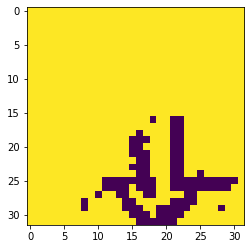

In [2]:
X = np.loadtxt('features.data').astype(np.uint8)
y = np.loadtxt('target.data').astype(np.uint8)

plt.imshow(X[10].reshape((32, 32)))

In [3]:
X = X.reshape((X.shape[0], 32, 32, 1))
X.shape

(900, 32, 32, 1)

In [4]:
y = np_utils.to_categorical(y, 3)

In [5]:
HIDDEN_SIZE = 128
CONVOLUTIONAL_SIZE = 64

model = Sequential()
model.add(Conv2D(CONVOLUTIONAL_SIZE, kernel_size=(3, 3), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(CONVOLUTIONAL_SIZE // 2, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(HIDDEN_SIZE, activation='relu'))
model.add(Dense(HIDDEN_SIZE, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [7]:
RANDOM_STATE = 42
BATCH_SIZE = 16
EPOCHS = 20
VAL_SPLIT = 0.05

## Обучение модели и оценка качества

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [9]:
history = model.fit(X_train, y_train, epochs=EPOCHS, verbose=0, batch_size=BATCH_SIZE, validation_split=VAL_SPLIT)

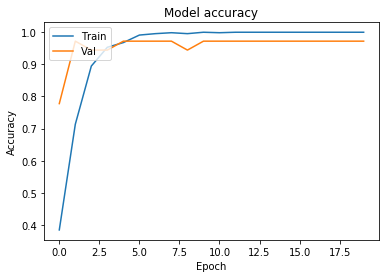

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

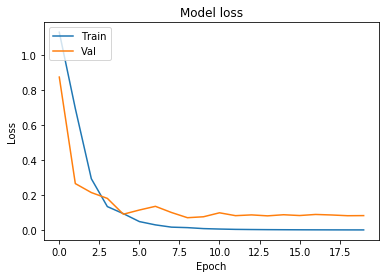

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

In [12]:
[loss, score] = model.evaluate(X_test, y_test)

180/180 [==============================] - 0s 401us/step


In [13]:
print(f"Test_score: {score}; Test_loss: {loss}")

Test_score: 0.9555555582046509; Test_loss: 0.14364745571122814


In [14]:
y_pred = model.predict(X_test)

In [15]:
wrong = []
for i in range(X_test.shape[0]):
    for j in range(3):
        if y_pred[i, j] < 0.5:
            y_pred[i, j] = 0
        else:
            y_pred[i, j] = 1
    if np.any(y_pred[i] != y_test[i]):
        wrong.append(X_test[i].reshape((32, 32)))

In [16]:
len(wrong)

8

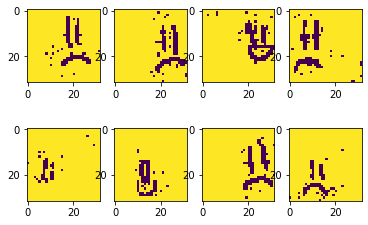

In [19]:
fig, axes = plt.subplots(ncols=4, nrows=2)

for i in range(8):
    axes[i // 4, i % 4].imshow(wrong[i])

Неправильно классифицировались в основном зашумленные изображения